In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
import pandas as pd
import io

# Create a dummy CSV file (replace with your actual file)
csv_data = """
Name,Age,City,Salary
Alice,25,New York,50000
Bob,30,Los Angeles,60000
Charlie,22,Chicago,45000
David,35,New York,70000
Eve,28,Los Angeles,55000
"""
csv_file = io.StringIO(csv_data) # Treat the string as a file

# Load the CSV data into a DataFrame
df = pd.read_csv(csv_file) # Replace 'your_data.csv' with your file path
print("Data loaded successfully!")

Data loaded successfully!


In [3]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
      Name  Age         City  Salary
0    Alice   25     New York   50000
1      Bob   30  Los Angeles   60000
2  Charlie   22      Chicago   45000
3    David   35     New York   70000
4      Eve   28  Los Angeles   55000


In [4]:
print("\nDataset information:")
df.info()

print("\nSummary statistics:")
print(df.describe())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
 3   Salary  5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes

Summary statistics:
             Age        Salary
count   5.000000      5.000000
mean   28.000000  56000.000000
std     4.949747   9617.692031
min    22.000000  45000.000000
25%    25.000000  50000.000000
50%    28.000000  55000.000000
75%    30.000000  60000.000000
max    35.000000  70000.000000


In [5]:
import numpy as np

salary_array = df['Salary'].values  # Or df.to_numpy()[:, 3] if Salary is the 4th column
print("\nSalary data as NumPy array:", salary_array)

mean_salary = np.mean(salary_array)
sum_salary = np.sum(salary_array)

print("Mean salary:", mean_salary)
print("Sum of salaries:", sum_salary)


Salary data as NumPy array: [50000 60000 45000 70000 55000]
Mean salary: 56000.0
Sum of salaries: 280000


In [6]:
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print("\nNumPy array:", data)

variance = np.var(data)
std_deviation = np.std(data)

print("Variance:", variance)
print("Standard deviation:", std_deviation)


NumPy array: [ 1  2  3  4  5  6  7  8  9 10]
Variance: 8.25
Standard deviation: 2.8722813232690143


In [7]:
filtered_data = data[data > 5]
print("\nFiltered data (values greater than 5):", filtered_data)


Filtered data (values greater than 5): [ 6  7  8  9 10]


In [8]:
# Add some missing data for demonstration
df.loc[2, 'Salary'] = None
df.loc[4, 'Age'] = None
print("\nOriginal DataFrame with missing values:")
print(df)


print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing 'Salary' with the mean
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
print("\nDataFrame after filling missing Salary values:")
print(df)

# Drop rows with any missing values
df_dropped = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped)


Original DataFrame with missing values:
      Name   Age         City   Salary
0    Alice  25.0     New York  50000.0
1      Bob  30.0  Los Angeles  60000.0
2  Charlie  22.0      Chicago      NaN
3    David  35.0     New York  70000.0
4      Eve   NaN  Los Angeles  55000.0

Missing values per column:
Name      0
Age       1
City      0
Salary    1
dtype: int64

DataFrame after filling missing Salary values:
      Name   Age         City   Salary
0    Alice  25.0     New York  50000.0
1      Bob  30.0  Los Angeles  60000.0
2  Charlie  22.0      Chicago  58750.0
3    David  35.0     New York  70000.0
4      Eve   NaN  Los Angeles  55000.0

DataFrame after dropping rows with missing values:
      Name   Age         City   Salary
0    Alice  25.0     New York  50000.0
1      Bob  30.0  Los Angeles  60000.0
2  Charlie  22.0      Chicago  58750.0
3    David  35.0     New York  70000.0


In [9]:
# Create a new column 'SalaryIncrease' (10% increase)
df['SalaryIncrease'] = df['Salary'] * 0.1
df['Salary'] = df['Salary'] + df['SalaryIncrease']
print("\nDataFrame with new 'SalaryIncrease' column and updated salary:")
print(df)

# Create a new column 'AgeCategory'
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 25, 35, 100], labels=['Young', 'Adult', 'Senior'])
print("\nDataFrame with 'AgeCategory':")
print(df)



DataFrame with new 'SalaryIncrease' column and updated salary:
      Name   Age         City   Salary  SalaryIncrease
0    Alice  25.0     New York  55000.0          5000.0
1      Bob  30.0  Los Angeles  66000.0          6000.0
2  Charlie  22.0      Chicago  64625.0          5875.0
3    David  35.0     New York  77000.0          7000.0
4      Eve   NaN  Los Angeles  60500.0          5500.0

DataFrame with 'AgeCategory':
      Name   Age         City   Salary  SalaryIncrease AgeCategory
0    Alice  25.0     New York  55000.0          5000.0       Young
1      Bob  30.0  Los Angeles  66000.0          6000.0       Adult
2  Charlie  22.0      Chicago  64625.0          5875.0       Young
3    David  35.0     New York  77000.0          7000.0       Adult
4      Eve   NaN  Los Angeles  60500.0          5500.0         NaN


In [10]:
# Group by 'City' and calculate the mean salary
mean_salary_by_city = df.groupby('City')['Salary'].mean()
print("\nMean salary by city:")
print(mean_salary_by_city)

# Group by 'City' and count the number of people
city_counts = df.groupby('City')['Name'].count()
print("\nNumber of people in each city:")
print(city_counts)

 # Group by 'AgeCategory' and calculate the mean salary
mean_salary_by_age_category = df.groupby('AgeCategory')['Salary'].mean()
print("\nMean salary by Age category:")
print(mean_salary_by_age_category)



Mean salary by city:
City
Chicago        64625.0
Los Angeles    63250.0
New York       66000.0
Name: Salary, dtype: float64

Number of people in each city:
City
Chicago        1
Los Angeles    2
New York       2
Name: Name, dtype: int64

Mean salary by Age category:
AgeCategory
Young     59812.5
Adult     71500.0
Senior        NaN
Name: Salary, dtype: float64


/tmp/ipykernel_4735/1743025579.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary_by_age_category = df.groupby('AgeCategory')['Salary'].mean()


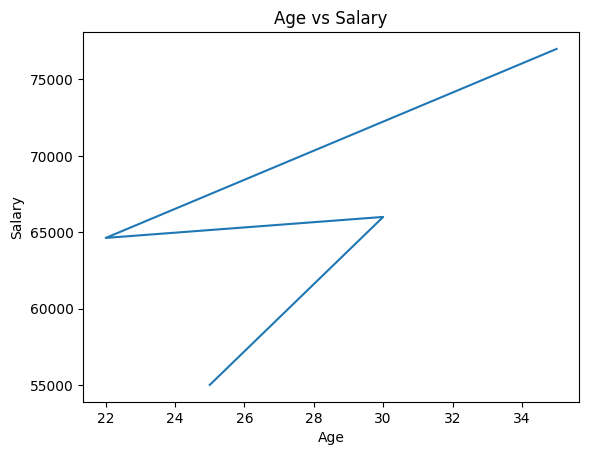

In [11]:
import matplotlib.pyplot as plt

plt.plot(df['Age'], df['Salary'])
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

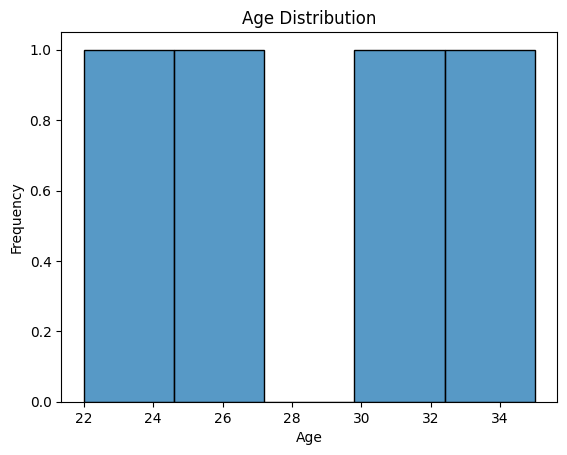

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import Matplotlib if you haven't already

sns.histplot(df['Age'], bins=5)  # Adjust the number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


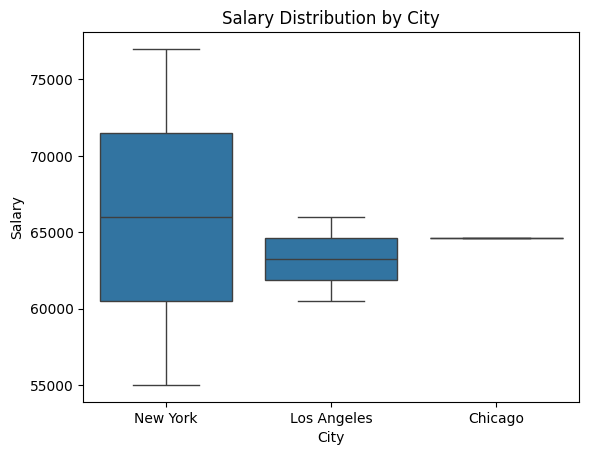

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='City', y='Salary', data=df)
plt.title('Salary Distribution by City')
plt.xlabel('City')
plt.ylabel('Salary')
plt.show()
